In [132]:
#installing librariers

!pip install xgboost

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [134]:
#installing librariers

!pip install seaborn

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
#import dependencies

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

In [5]:
#Load Data

df = pd.read_csv('diabetes.csv')

DATA ANALYZATION

In [8]:
#To show the first five rows of data

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
#To show the last five rows of data

df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [12]:
#to show entire dataframe
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
#description of the data in the DataFrame

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
#shape of data (row, columns)
df.shape

(768, 9)

In [18]:
#data information to find out integer and float values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
#to check for unique value of each column

df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [23]:
#finding the null value

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
#showing value counts of the outcome column


df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

DATA VISUALIZATION

Outcome
0    500
1    268
Name: count, dtype: int64


<Axes: title={'center': 'Plot_Outcome (Non-Diabetic=0 , Diabetic=1)'}, xlabel='Outcome', ylabel='count'>

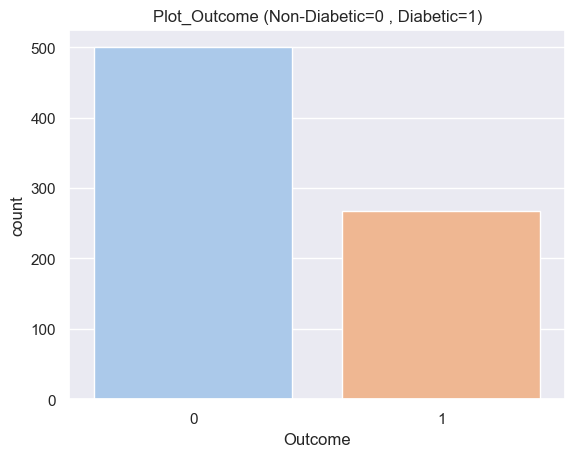

In [28]:
#remove warnings

import warnings
warnings.filterwarnings("ignore")

#Plotting histogram on Outcome Column

sns.set(style = 'darkgrid')
print(df['Outcome'].value_counts())
plt.title('Plot_Outcome (Non-Diabetic=0 , Diabetic=1)')
sns.countplot(df, x='Outcome', palette= "pastel")

array([<Axes: ylabel='count'>], dtype=object)

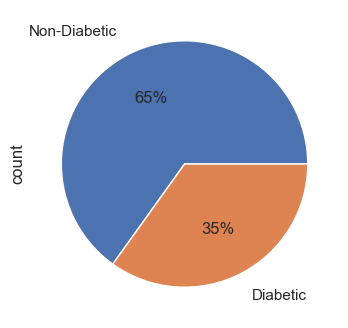

In [30]:
#Pie Chart on the percentage of Diabetic and Non-Diabetic value

import matplotlib.style as style
style.available


labels = ('Non-Diabetic' , 'Diabetic')
df['Outcome'].value_counts().plot(kind='pie', labels=labels, subplots=True, autopct= '%1.0f%%', labeldistance=1.2, figsize=(4,4))


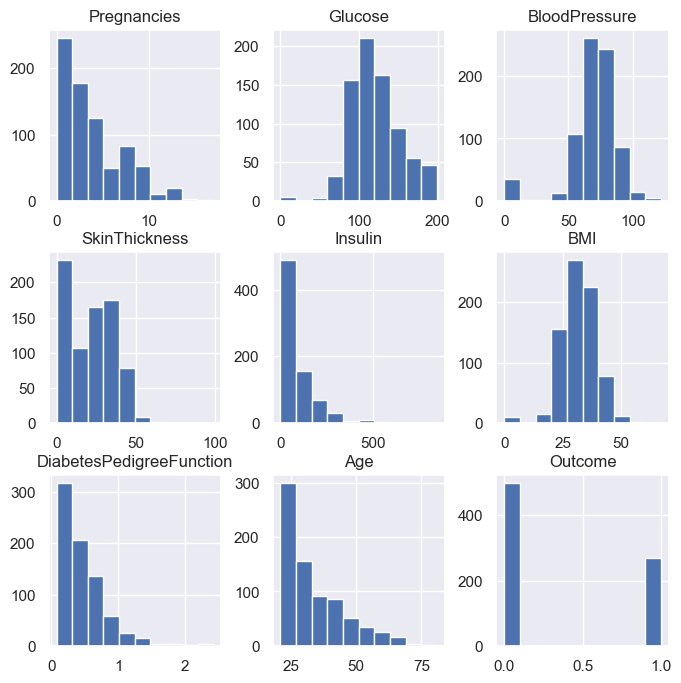

In [49]:
df.hist(bins=10, figsize=(8,8)) 
plt.show()

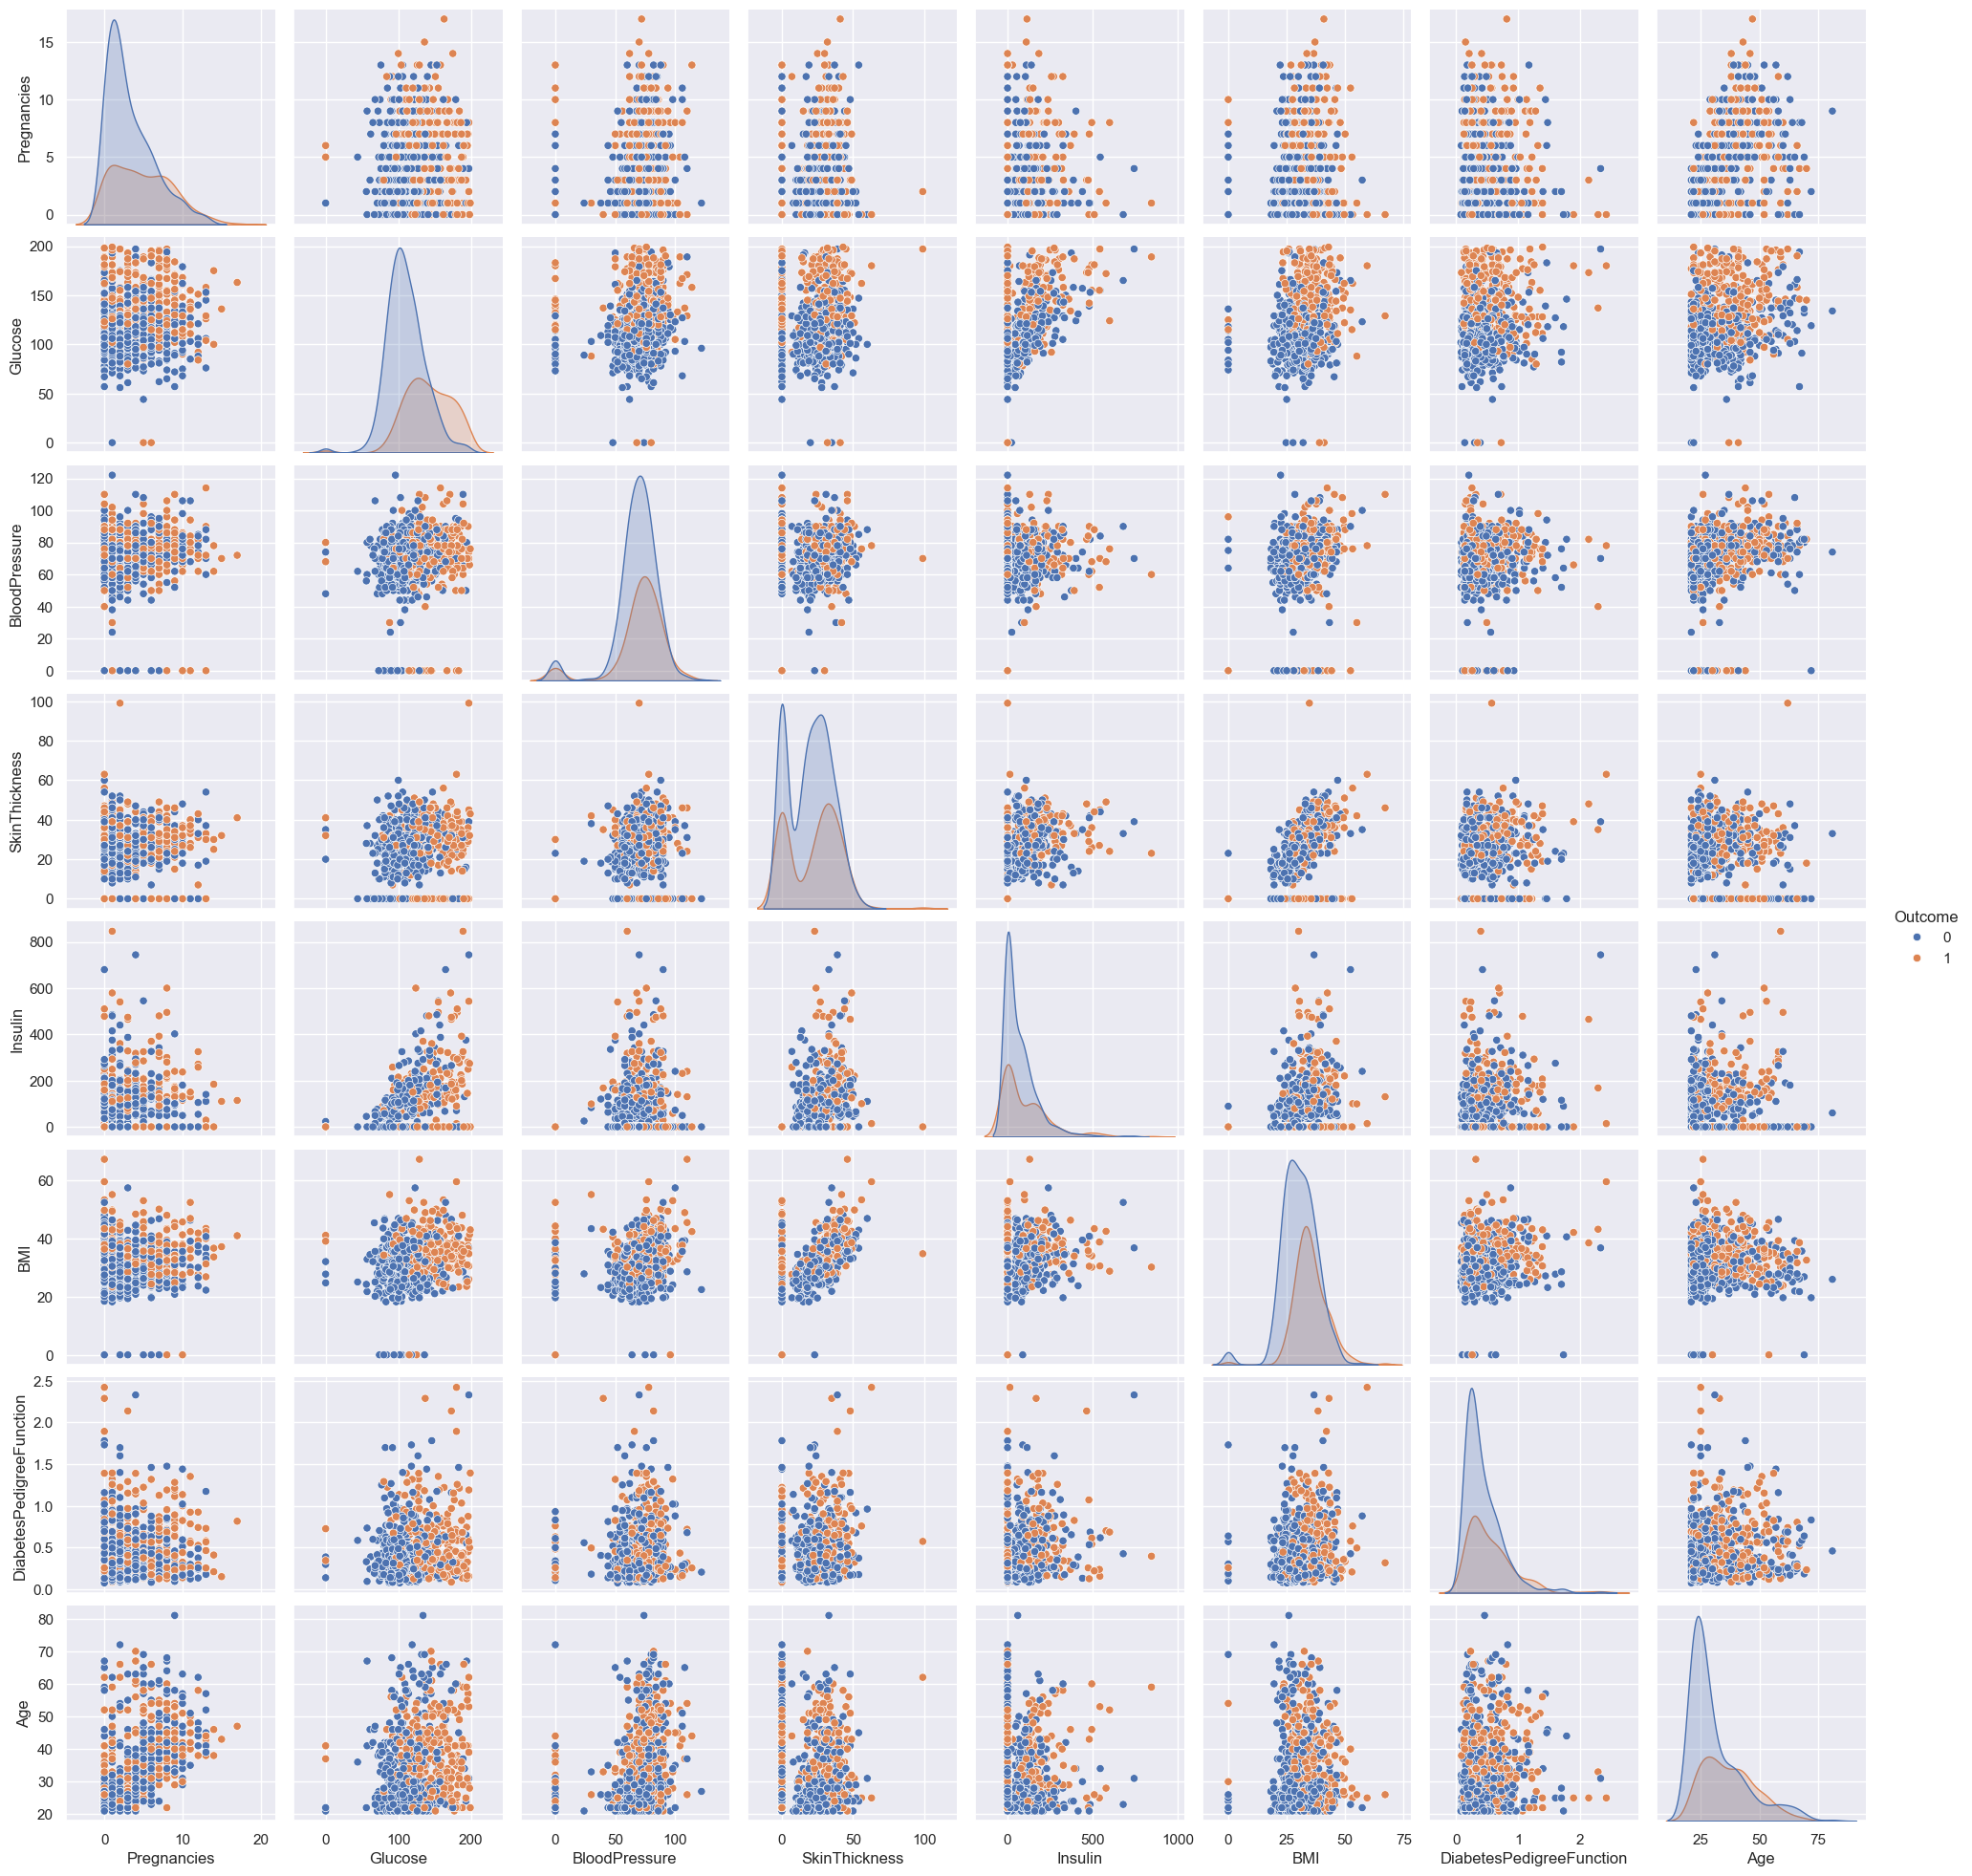

In [34]:
sns.pairplot(data=df,  hue='Outcome')
plt.show()

In [35]:
#data correlation

corr = df.corr(method= 'pearson')
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


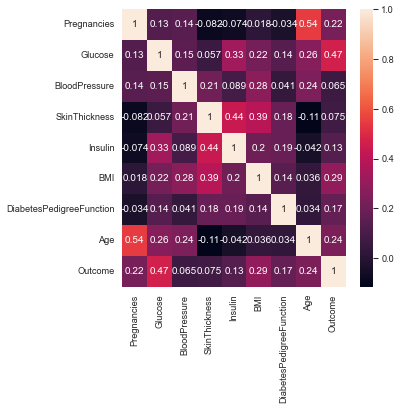

In [62]:
#data correlation visualization

plt.figure(figsize=(6,6), dpi=100)
sns.heatmap(corr, annot=True)
plt.show()D

In [37]:
#Separating the data and labels

X= df.drop(columns='Outcome', axis=1)
y= df['Outcome']

DATA STANDARIZATION

In [53]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [55]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


DATA SCALING

In [58]:
#Using the Standardscaler function to scale the data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

CREATING MODEL AND TESTING

In [61]:
#Using LogisticRegression Classification Model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [63]:
from sklearn.metrics import accuracy_score

y_pred = logreg.predict(X_test_scaled)
logreg_accuracy_train=accuracy_score(y_train, logreg.predict(X_train_scaled))

print(logreg_accuracy_train)

#trained model accuracy

0.7703583061889251


In [65]:
logreg_accuracy_test=accuracy_score(y_test, logreg.predict(X_test_scaled))

print(logreg_accuracy_test)

#test model accuracy

0.7857142857142857


In [67]:
#Creating the confusion matrix from the output

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm





array([[86, 13],
       [20, 35]], dtype=int64)

<Axes: >

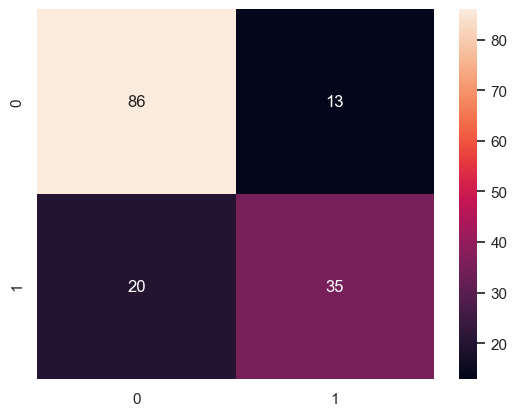

In [69]:
#confusion matrix visualization

sns.heatmap(cm, annot=True)

In [71]:
#to show the classification report 

from sklearn.metrics import classification_report

classrep = classification_report(y_test, y_pred)
print(classrep)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [73]:
#Using KNeighbors Classification Model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [75]:
y_pred = knn.predict(X_test_scaled)
KNN_accuracy_train = accuracy_score(y_train, knn.predict(X_train_scaled))

print(KNN_accuracy_train)

#trained model accuracy

0.8241042345276873


In [77]:
KNN_accuracy_test = accuracy_score(y_test, knn.predict(X_test_scaled))

print(KNN_accuracy_test)

##test model accuracy

0.6948051948051948


In [79]:
#Creating the confusion matrix from the output

cm = confusion_matrix(y_test, y_pred)
cm



array([[83, 16],
       [31, 24]], dtype=int64)

<Axes: >

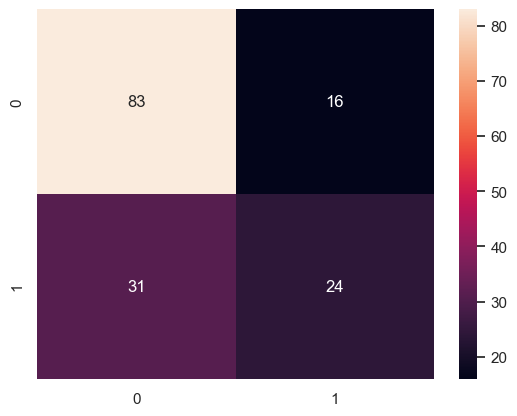

In [81]:
#confusion matrix visualization

sns.heatmap(cm, annot=True)

In [83]:
#to show the classification report 

from sklearn.metrics import classification_report

classrep = classification_report(y_test, y_pred)
print(classrep)

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        99
           1       0.60      0.44      0.51        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.64       154
weighted avg       0.68      0.69      0.68       154



In [85]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)

param = {
          'gamma': [0.001, 0.01, 0.1,],
           'C'   : [0.01, 0.05,0.1,0.5,1,10,15,20]
}
grid_search = GridSearchCV(svc, param)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 10, 15, 20],
                         'gamma': [0.001, 0.01, 0.1]})

In [86]:
grid_search.best_params_

{'C': 20, 'gamma': 0.001}

In [89]:
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train_scaled, y_train)

SVC(C=15, gamma=0.01, probability=True)

In [91]:
y_pred = svc.predict(X_test_scaled)
svc_accuracy_train =accuracy_score(y_train, svc.predict(X_train_scaled))

print(svc_accuracy_train)

#trained model accuracy

0.7980456026058632


In [93]:
svc_accuracy_test = accuracy_score(y_test, svc.predict(X_test_scaled))
print(svc_accuracy_test)

#test model accuracy

0.7857142857142857


In [95]:
#Creating the confusion matrix from the output

cm = confusion_matrix(y_test, y_pred)
cm



array([[88, 11],
       [22, 33]], dtype=int64)

<Axes: >

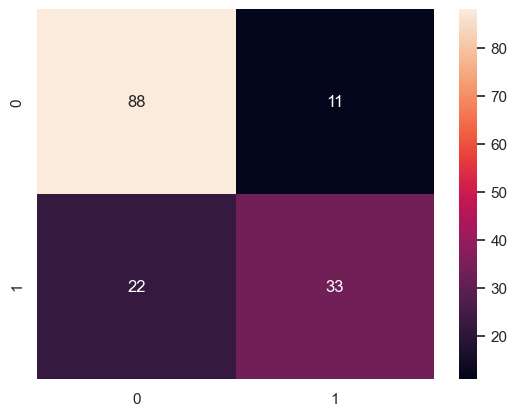

In [97]:
sns.heatmap(cm, annot=True)

In [99]:
#to show the classification report 

from sklearn.metrics import classification_report

classrep = classification_report(y_test, y_pred)
print(classrep)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [101]:
#Using XGBoost Classification Model

from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate=0.01, max_depth =5, n_estimator = 180)
xgb.fit(X_train_scaled, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=180, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [103]:
y_pred = xgb.predict(X_test_scaled)
xgb_accuracy_train = accuracy_score(y_train, xgb.predict(X_train_scaled))

print(xgb_accuracy_train)

#trained model accuracy

0.8534201954397395


In [105]:
xgb_accuracy_test = accuracy_score(y_test, xgb.predict(X_test_scaled))
print(xgb_accuracy_test)

#test model accuracy

0.7597402597402597


In [107]:
#Creating the confusion matrix from the output

cm = confusion_matrix(y_test, y_pred)
cm

array([[90,  9],
       [28, 27]], dtype=int64)

<Axes: >

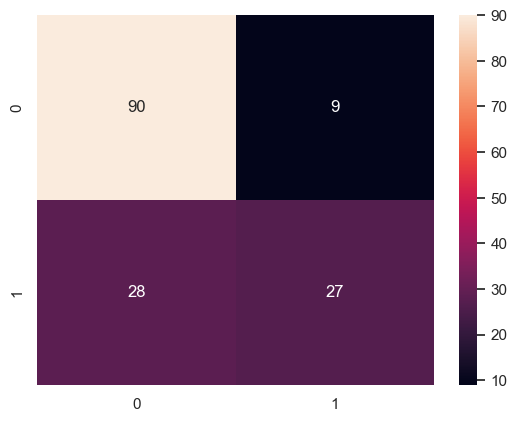

In [109]:
sns.heatmap(cm, annot=True)

#confusion matrix visualization

In [111]:
classrep = classification_report(y_test, y_pred)
print(classrep)

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        99
           1       0.75      0.49      0.59        55

    accuracy                           0.76       154
   macro avg       0.76      0.70      0.71       154
weighted avg       0.76      0.76      0.75       154



In [113]:
#To create a table for Model comparing with Accuracy Score

models = pd.DataFrame({
         'Model' : ['Logistic Regression', 'KNeighborsClassifier' , 'SVC', 'XGBClassifier'],
          'Accuracy score' : [logreg_accuracy_test,KNN_accuracy_test,svc_accuracy_test,xgb_accuracy_test]
})

models.sort_values(by= 'Accuracy score')

,Model,Accuracy score
1,KNeighborsClassifier,0.694805
3,XGBClassifier,0.759740
0,Logistic Regression,0.785714
2,SVC,0.785714


In [115]:
#Using GridSearchCV to improve the accuracy


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param = {
          'C': [0.001, 0.01, 0.1,],
           'gamma'   : [0.01, 0.05,0.1,0.5,1,10,15,20]}

SVC_grid = GridSearchCV(SVC(kernel='rbf'),
                        param,
                        refit= True,
                        cv=10,
                        verbose=3)
SVC_grid.fit(X_train_scaled, y_train)


Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END ..............C=0.001, gamma=0.01;, score=0.661 total time=   0.0s
[CV 2/10] END ..............C=0.001, gamma=0.01;, score=0.645 total time=   0.0s
[CV 3/10] END ..............C=0.001, gamma=0.01;, score=0.645 total time=   0.0s
[CV 4/10] END ..............C=0.001, gamma=0.01;, score=0.645 total time=   0.0s
[CV 5/10] END ..............C=0.001, gamma=0.01;, score=0.656 total time=   0.0s
[CV 6/10] END ..............C=0.001, gamma=0.01;, score=0.656 total time=   0.0s
[CV 7/10] END ..............C=0.001, gamma=0.01;, score=0.656 total time=   0.0s
[CV 8/10] END ..............C=0.001, gamma=0.01;, score=0.656 total time=   0.0s
[CV 9/10] END ..............C=0.001, gamma=0.01;, score=0.656 total time=   0.0s
[CV 10/10] END .............C=0.001, gamma=0.01;, score=0.656 total time=   0.0s
[CV 1/10] END ..............C=0.001, gamma=0.05;, score=0.661 total time=   0.0s
[CV 2/10] END ..............C=0.001, gamma=0.0

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 10, 15, 20]},
             verbose=3)

In [117]:
SVC_grid.best_params_

{'C': 0.1, 'gamma': 0.1}

In [119]:
SVC_grid.best_score_

0.7475145425700687

In [121]:
import joblib

In [123]:
joblib.dump(knn, "knn_diabetic.pkl")

['knn_diabetic.pkl']

In [125]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [127]:
joblib.dump(logreg, "logreg_diabetic.pkl")

['logreg_diabetic.pkl']